## Preparation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
path = "/content/drive/MyDrive/ColabNotebooks/DD2360/hw3_1"
os.chdir(path)
!ls

ex_1  ex_1.cu  ex_2  ex_2.cu  ex_3.cu  try  try.cu  vectorAdd  vectorAdd.cu


## Compiling and Execution

In [5]:
!nvcc -arch=sm_75 ex_2.cu -o ex_2

ex_2.cu(41): warning: variable "numBRows" was set but never used

ex_2.cu(43): warning: variable "numCRows" was set but never used

ex_2.cu(44): warning: variable "numCColumns" was set but never used



In [ ]:
!./ex_2 128 128 128

Input matrix dim (128 x 128) (128 x 128) (128 x 128)
Equal!
Data copy from host to device time: 0.000123
Kernel launching time: 0.000122
Data copy from device to host time: 0.000113


In [ ]:
!./ex_2 511 1023 4094

Input matrix dim (511 x 1023) (1023 x 4094) (511 x 4094)
Equal!
Data copy from host to device time: 0.009557
Kernel launching time: 0.047570
Data copy from device to host time: 0.010373


## NVIDIA Nsight Systems for Profiling

In [ ]:
!/usr/local/cuda-11/bin/nv-nsight-cu-cli ./ex_2 128 128 128

Input matrix dim (128 x 128) (128 x 128) (128 x 128)
==PROF== Connected to process 4106 (/content/drive/MyDrive/ColabNotebooks/DD2360/hw3_1/ex_2)
==PROF== Profiling "gemm" - 1: 0%....50%....100% - 8 passes
Equal!
Data copy from host to device time: 0.000113
Kernel launching time: 0.848985
Data copy from device to host time: 0.000141
==PROF== Disconnected from process 4106
[4106] ex_2@127.0.0.1
  gemm(double*, double*, double*, int, int, int, int), 2022-Dec-15 21:30:52, Context 1, Stream 7
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           4.98
    SM Frequency                                                             cycle/usecond                         583.43
    Elapsed Cycles                                                                   cycle                  

In [ ]:
!/usr/local/cuda-11/bin/nv-nsight-cu-cli ./ex_2 511 1023 4094

Input matrix dim (511 x 1023) (1023 x 4094) (511 x 4094)
==PROF== Connected to process 4187 (/content/drive/MyDrive/ColabNotebooks/DD2360/hw3_1/ex_2)
==PROF== Profiling "gemm" - 1: 0%....50%....100% - 8 passes
Equal!
Data copy from host to device time: 0.009557
Kernel launching time: 1.028793
Data copy from device to host time: 0.010650
==PROF== Disconnected from process 4187
[4187] ex_2@127.0.0.1
  gemm(double*, double*, double*, int, int, int, int), 2022-Dec-15 21:36:53, Context 1, Stream 7
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           5.00
    SM Frequency                                                             cycle/usecond                         584.98
    Elapsed Cycles                                                                   cycle              

## Stacked bar chart: double

In [ ]:
!./ex_2 600 1023 4100

Input matrix dim (600 x 1023) (1023 x 4100) (600 x 4100)
Equal!
Data copy from host to device time: 0.008338
Kernel launching time: 0.055917
Data copy from device to host time: 0.012827


In [ ]:
!./ex_2 650 1023 4200

Input matrix dim (650 x 1023) (1023 x 4200) (650 x 4200)
Equal!
Data copy from host to device time: 0.008798
Kernel launching time: 0.061965
Data copy from device to host time: 0.014074


In [ ]:
!./ex_2 650 1023 4300

Input matrix dim (650 x 1023) (1023 x 4300) (650 x 4300)
Equal!
Data copy from host to device time: 0.008786
Kernel launching time: 0.063341
Data copy from device to host time: 0.014257


In [ ]:
!./ex_2 700 1023 4250

Input matrix dim (700 x 1023) (1023 x 4250) (700 x 4250)
Equal!
Data copy from host to device time: 0.009160
Kernel launching time: 0.067462
Data copy from device to host time: 0.015201


In [ ]:
!./ex_2 750 1023 4300

Input matrix dim (750 x 1023) (1023 x 4300) (750 x 4300)
Equal!
Data copy from host to device time: 0.008715
Kernel launching time: 0.073116
Data copy from device to host time: 0.016980


In [ ]:
!./ex_2 800 1023 4300

Input matrix dim (800 x 1023) (1023 x 4300) (800 x 4300)
Equal!
Data copy from host to device time: 0.008866
Kernel launching time: 0.077931
Data copy from device to host time: 0.018235


In [ ]:
!./ex_2 1000 1023 4350

Input matrix dim (1000 x 1023) (1023 x 4350) (1000 x 4350)
Equal!
Data copy from host to device time: 0.009500
Kernel launching time: 0.098499
Data copy from device to host time: 0.023451


In [ ]:
!./ex_2 2000 1023 4350

Input matrix dim (2000 x 1023) (1023 x 4350) (2000 x 4350)
Equal!
Data copy from host to device time: 0.011796
Kernel launching time: 0.177772
Data copy from device to host time: 0.044840


In [ ]:
!./ex_2 3000 1023 4350

Input matrix dim (3000 x 1023) (1023 x 4350) (3000 x 4350)
Equal!
Data copy from host to device time: 0.014067
Kernel launching time: 0.257940
Data copy from device to host time: 0.066673


In [ ]:
!./ex_2 4000 1023 4400

Input matrix dim (4000 x 1023) (1023 x 4400) (4000 x 4400)
Equal!
Data copy from host to device time: 0.015862
Kernel launching time: 0.320241
Data copy from device to host time: 0.089935


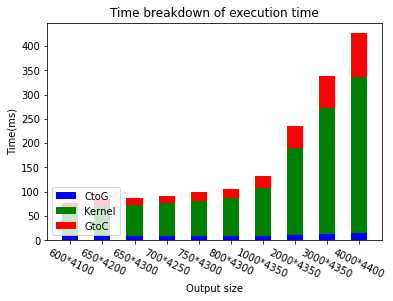

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.title('Time breakdown of execution time')

N = 10
plt.xlabel('Output size')
ind = np.arange(N)  #[ 0  1  2  3  4  5  6  7  8  9 ]
plt.xticks(ind, ('600*4100', '650*4200', '650*4300', '700*4250', '750*4300', 
                 '800*4300', '1000*4350', '2000*4350', '3000*4350', '4000*4400'))

plt.ylabel('Time(ms)')
plt.yticks(np.arange(0, 500, 50))

CtoG = (8.338, 8.798, 8.786, 9.160, 8.715, 8.866, 9.5, 11.796, 14.067, 15.862)
Kernel = (55.917, 61.965, 63.341, 67.462, 73.116, 77.931, 98.499, 177.772, 257.94, 320.241)
GtoC = (12.827, 14.074, 14.257, 15.201, 16.98, 18.235, 23.451, 44.84, 66.673, 89.935)

d = []
for i in range(0, len(CtoG)):
    sum = CtoG[i] + Kernel[i]
    d.append(sum)

width = 0.5
p1 = plt.bar(ind, CtoG, width, color='blue') 
p2 = plt.bar(ind, Kernel, width, bottom=CtoG,color='green')  
p3 = plt.bar(ind, GtoC, width, bottom=d,color='red')

plt.legend((p1[0], p2[0], p3[0]), ('CtoG', 'Kernel', 'GtoC'),loc = 3)
plt.xticks(rotation=-25)
plt.show()

## Stacked bar chart: float

In [6]:
!./ex_2 600 1023 4100

Input matrix dim (600 x 1023) (1023 x 4100) (600 x 4100)
Equal!
Data copy from host to device time: 0.004201
Kernel launching time: 0.017713
Data copy from device to host time: 0.006209


In [21]:
!./ex_2 650 1023 4200

Input matrix dim (650 x 1023) (1023 x 4200) (650 x 4200)
Equal!
Data copy from host to device time: 0.004309
Kernel launching time: 0.019597
Data copy from device to host time: 0.007618


In [8]:
!./ex_2 650 1023 4300

Input matrix dim (650 x 1023) (1023 x 4300) (650 x 4300)
Equal!
Data copy from host to device time: 0.004404
Kernel launching time: 0.020118
Data copy from device to host time: 0.007168


In [9]:
!./ex_2 700 1023 4250

Input matrix dim (700 x 1023) (1023 x 4250) (700 x 4250)
Equal!
Data copy from host to device time: 0.004449
Kernel launching time: 0.021470
Data copy from device to host time: 0.007662


In [18]:
!./ex_2 750 1023 4300

Input matrix dim (750 x 1023) (1023 x 4300) (750 x 4300)
Equal!
Data copy from host to device time: 0.004475
Kernel launching time: 0.023232
Data copy from device to host time: 0.008865


In [20]:
!./ex_2 800 1023 4300

Input matrix dim (800 x 1023) (1023 x 4300) (800 x 4300)
Equal!
Data copy from host to device time: 0.004505
Kernel launching time: 0.024767
Data copy from device to host time: 0.009330


In [12]:
!./ex_2 1000 1023 4350

Input matrix dim (1000 x 1023) (1023 x 4350) (1000 x 4350)
Equal!
Data copy from host to device time: 0.004897
Kernel launching time: 0.031483
Data copy from device to host time: 0.011089


In [13]:
!./ex_2 2000 1023 4350

Input matrix dim (2000 x 1023) (1023 x 4350) (2000 x 4350)
Equal!
Data copy from host to device time: 0.006566
Kernel launching time: 0.062894
Data copy from device to host time: 0.022300


In [14]:
!./ex_2 3000 1023 4350

Input matrix dim (3000 x 1023) (1023 x 4350) (3000 x 4350)
Equal!
Data copy from host to device time: 0.006679
Kernel launching time: 0.094193
Data copy from device to host time: 0.033003


In [15]:
!./ex_2 4000 1023 4400

Input matrix dim (4000 x 1023) (1023 x 4400) (4000 x 4400)
Equal!
Data copy from host to device time: 0.007781
Kernel launching time: 0.123980
Data copy from device to host time: 0.044512


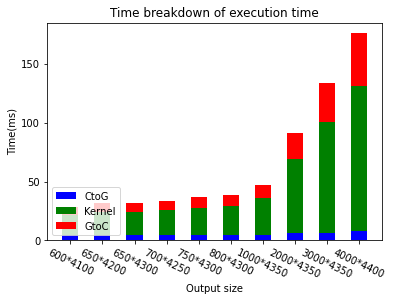

In [22]:
import numpy as np
import matplotlib.pyplot as plt

plt.title('Time breakdown of execution time')

N = 10
plt.xlabel('Output size')
ind = np.arange(N)  #[ 0  1  2  3  4  5  6  7  8  9 ]
plt.xticks(ind, ('600*4100', '650*4200', '650*4300', '700*4250', '750*4300', 
                 '800*4300', '1000*4350', '2000*4350', '3000*4350', '4000*4400'))

plt.ylabel('Time(ms)')
plt.yticks(np.arange(0, 200, 50))

CtoG = (4.201, 4.309, 4.404, 4.449, 4.475, 4.505, 4.897, 6.566, 6.679, 7.781)
Kernel = (17.713, 19.597, 20.118, 21.470, 23.232, 24.767, 31.483, 62.894, 94.193, 123.98)
GtoC = (6.209, 7.618, 7.168, 7.662, 8.865, 9.33, 11.089, 22.3, 33.003, 44.512)

d = []
for i in range(0, len(CtoG)):
    sum = CtoG[i] + Kernel[i]
    d.append(sum)

width = 0.5
p1 = plt.bar(ind, CtoG, width, color='blue') 
p2 = plt.bar(ind, Kernel, width, bottom=CtoG,color='green')  
p3 = plt.bar(ind, GtoC, width, bottom=d,color='red')

plt.legend((p1[0], p2[0], p3[0]), ('CtoG', 'Kernel', 'GtoC'),loc = 3)
plt.xticks(rotation=-25)
plt.show()